In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3 as db
from pandas.io import sql
from matplotlib import pylab
#from mayavi import mlab

#import graphviz as gz


cnx = db.connect(':memory:')    # this ensure sqlite tables stay in memory

import networkx as nx

# Use multigraph (allows many edges)
G=nx.MultiGraph()

#G1=nx.DiGraph()
#G2=nx.Graph()

In [2]:
# Read in the artist_artist_similarty_names file 
# Add the input file to sqllite

pd1 = pd.read_csv("artist_artist_similarty_names.csv" , encoding='ISO-8859-1') 
#pd1 = pd.read_csv("artist_artist_similarty.csv" , encoding='ISO-8859-1') 

In [3]:
pd1.head(5)

,Unnamed: 0,artist_name1,artist_name2
0,0,Carroll Thompson,Singing Melody Feat. Robyn
1,1,Carroll Thompson,Maxi Priest
2,2,Carroll Thompson,John Legend [feat. Buju Banton]
3,3,Carroll Thompson,Winston Reedy
4,4,Carroll Thompson,Thriller U


In [4]:
# produce a list
#
# the following convert a dataframe into a list of tubles
list_names =  [(x,y) for i,x,y in pd1.values.tolist() ]

In [5]:
print (list_names[1:3])
print (len(list_names))

[('Carroll Thompson', 'Maxi Priest'), ('Carroll Thompson', 'John Legend [feat. Buju Banton]')]
42969


In [6]:
#   Now load all the tags
#
artistname_mbtags = pd.read_csv("artistname_mbtags.csv" , encoding='ISO-8859-1') 
 
# produce a list
list_mbtags =  [(x,y) for i,x,y in artistname_mbtags.values.tolist() ]

In [7]:
# Now, try and add nodes,  first clear then use list created above 
G.clear()
G.add_edges_from(list_names)
#G.add_edges_from(list_mbtags)

In [8]:
# check number of nodes     Note the 3815 number of nodes is great
G.number_of_nodes()

3802

In [9]:
# check number of edges     Note the 33000 number of edges looks good
G.number_of_edges()

42969

In [10]:
# Get list of nodes
G.nodes() 

['Solistiyhtye Suomi',
 'Neviss',
 'Nic Endo',
 'J. Peter Robinson',
 'The LeRoi Brothers',
 'Hotwire',
 'Tommy Makem;The Clancy Brothers',
 'Los Chunguitos',
 'Percy Mayfield',
 'Dilated Peoples',
 'Lady May',
 'Rea_ Chris',
 'An Cafe',
 'The Merry Macs',
 'Tullycraft',
 'BeauSoleil',
 'Wamdue Project',
 'Be Bop Deluxe',
 'Population Reduction',
 'Assassin',
 '50 Cent',
 'The Lord Weird Slough Feg',
 'Los Originales De San Juan',
 'Jimmy Witherspoon',
 'Plies',
 'Gerard Lenorman',
 'DJ Godfather',
 'Annie Minogue Band',
 'Stickboy',
 'Marcus Miller',
 'Grup Knar',
 'Annie Philippe',
 'Alan Feinberg',
 'Fuel',
 'Bruce Springsteen',
 'Rhian Lois',
 'The Dillinger Escape Plan',
 'Cracker',
 'The Sonics',
 'Eddie Palmieri',
 'Vince Taylor',
 '30 Seconds To Mars',
 'Adalberto Santiago',
 'Tijuana Hercules',
 'Ricky Martin',
 'Goldfish',
 '3 Way Funk',
 'Pinchers',
 'BrÃ¶derna Djup',
 'Sleepy John Estes',
 'Deep Blue Something',
 'The White Stripes',
 'Grant Geissman',
 'YGGDRASIL',
 'Don G

In [11]:
#get edges,  choose a ramdom artist key
G.edges(['T-Bone','Pale Forest'])

[('T-Bone', 'J.R. Writer_ Jha Jha'),
 ('T-Bone', 'Kirk Franklin'),
 ('T-Bone', 'Ill Harmonics'),
 ('T-Bone', 'Ill Harmonics'),
 ('T-Bone', 'Flame'),
 ('T-Bone', 'Mars Ill'),
 ('T-Bone', 'Mars Ill'),
 ('Pale Forest', 'Gathering'),
 ('Pale Forest', 'The Gathering'),
 ('Pale Forest', "Punk'd Royal")]

In [12]:
# get neighbors using artist id for 'the rolling stones'  ARFCUN31187B9AD578 

#  Checked below, this looks good
try:
    print(G.neighbors('Michael Jackson'))
except:
    print ('no neighbors ')

['Backstreet Boys', 'N.E.R.D.', 'Mariah Carey', 'Wang Chung', 'Jennifer Lopez', 'Willie Bobo', 'Janet Jackson', 'Sade', 'Vitamin C', 'Enrique Iglesias', 'Usher', 'Britney Spears', 'Jets', 'Madonna', 'Chucho ValdÃ©s', 'Adrienne Pierce', 'BeyoncÃ©', 'Prince', 'Jyve V', 'Simply Red', 'Justin Timberlake', 'Lionel Richie', 'The Jets', 'George Michael', 'Rick Astley', 'Savage Garden', 'Wet Wet Wet', 'Boyz II Men', 'Toni Braxton', 'Christina Aguilera']


In [13]:
G.degree()

{'Solistiyhtye Suomi': 20,
 'Neviss': 21,
 'Nic Endo': 21,
 'J. Peter Robinson': 31,
 'Sandy Posey': 44,
 'Hotwire': 16,
 'Tommy Makem;The Clancy Brothers': 30,
 'Los Chunguitos': 28,
 'Percy Mayfield': 42,
 'Dilated Peoples': 45,
 'Lady May': 6,
 'Rea_ Chris': 18,
 'Geddy Lee': 8,
 'The Merry Macs': 2,
 'Tullycraft': 21,
 'BeauSoleil': 31,
 'Peter Spence': 29,
 'Dann Huff': 3,
 'Assassin': 11,
 '50 Cent': 40,
 'The Lord Weird Slough Feg': 11,
 'Danny Davis & The Boys': 14,
 'Jimmy Witherspoon': 42,
 'Plies': 39,
 'Gerard Lenorman': 23,
 'DJ Godfather': 27,
 'Annie Minogue Band': 1,
 'Herbstrock': 9,
 'Marcus Miller': 22,
 'Grup Knar': 15,
 'Annie Philippe': 10,
 'Alan Feinberg': 2,
 'Bruce Springsteen': 33,
 'Rhian Lois': 4,
 'The Dillinger Escape Plan': 34,
 'Cracker': 26,
 'The Sonics': 27,
 'Eddie Palmieri': 118,
 'Vince Taylor': 5,
 '30 Seconds To Mars': 34,
 'Adalberto Santiago': 34,
 'Tijuana Hercules': 11,
 'Charlie Louvin': 15,
 'Goldfish': 7,
 '3 Way Funk': 6,
 'Pinchers': 39

In [25]:
#  find the shortest path
#

#p1 = 'Michael Jackson'
#p1='Johnny Horton'
#p1= 'The Stranglers'
p1='Lady May'
#p1='Lou Reed'
p2 = 'Britney Spears'
p2='Milo'
try:
    connectppl= nx.shortest_path(G,p1,p2)
    print (nx.shortest_path(G,p1,p2))
except:
    print ('no shortest path found') 

['Lady May', 'Ms. Dynamite / Bounty Killer', 'Usher', 'Seal', 'Phil Collins', 'Milo']


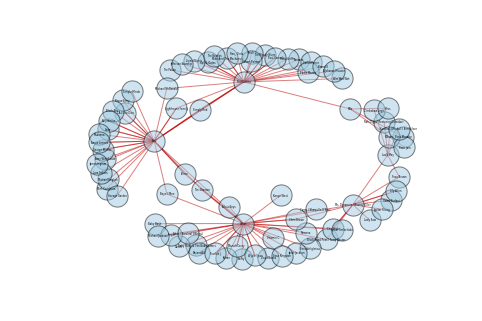

In [26]:
# when creating a graph structure by instantiating one of the graph classes you can specify data in several formats
#
# create a list of edges 
edgelist = G.edges(connectppl) 

H=nx.MultiGraph(edgelist)

nx.draw(H,node_color='#A0CBE2',edge_color='#BB0000',vmin=1.0,vmax=5.9,alpha=.5,font_size=2.5,width=1,edge_cmap=plt.cm.Blues,with_labels=True, node_size=450)

plt.savefig('myfig.png')
plt.savefig("graph.pdf", dpi=100)

In [16]:
# Export the Graph database
#
#
import json
from networkx.readwrite import json_graph

for n in G:
    G.node[n]['name'] = n

d = json_graph.node_link_data(G)
json.dump(d, open('force.json','w'))


In [17]:
 #  find the shortest path
#

p1='Lou Reed'
p2 = 'Britney Spears'
#p1= 'finnish'

#p2='Jimmy Cliff'
try:
    connectppl= nx.shortest_path(G,p1,p2)
    print (nx.shortest_path(G,p1,p2))
except:
    print ('no shortest path found') 

['Lou Reed', 'Talking Heads', 'Gwen Stefani', 'Britney Spears']


In [18]:
#  Checked below, this looks good
try:
    print(G.neighbors('rnb'))
except:
    print ('no neighbors ')    

no neighbors 


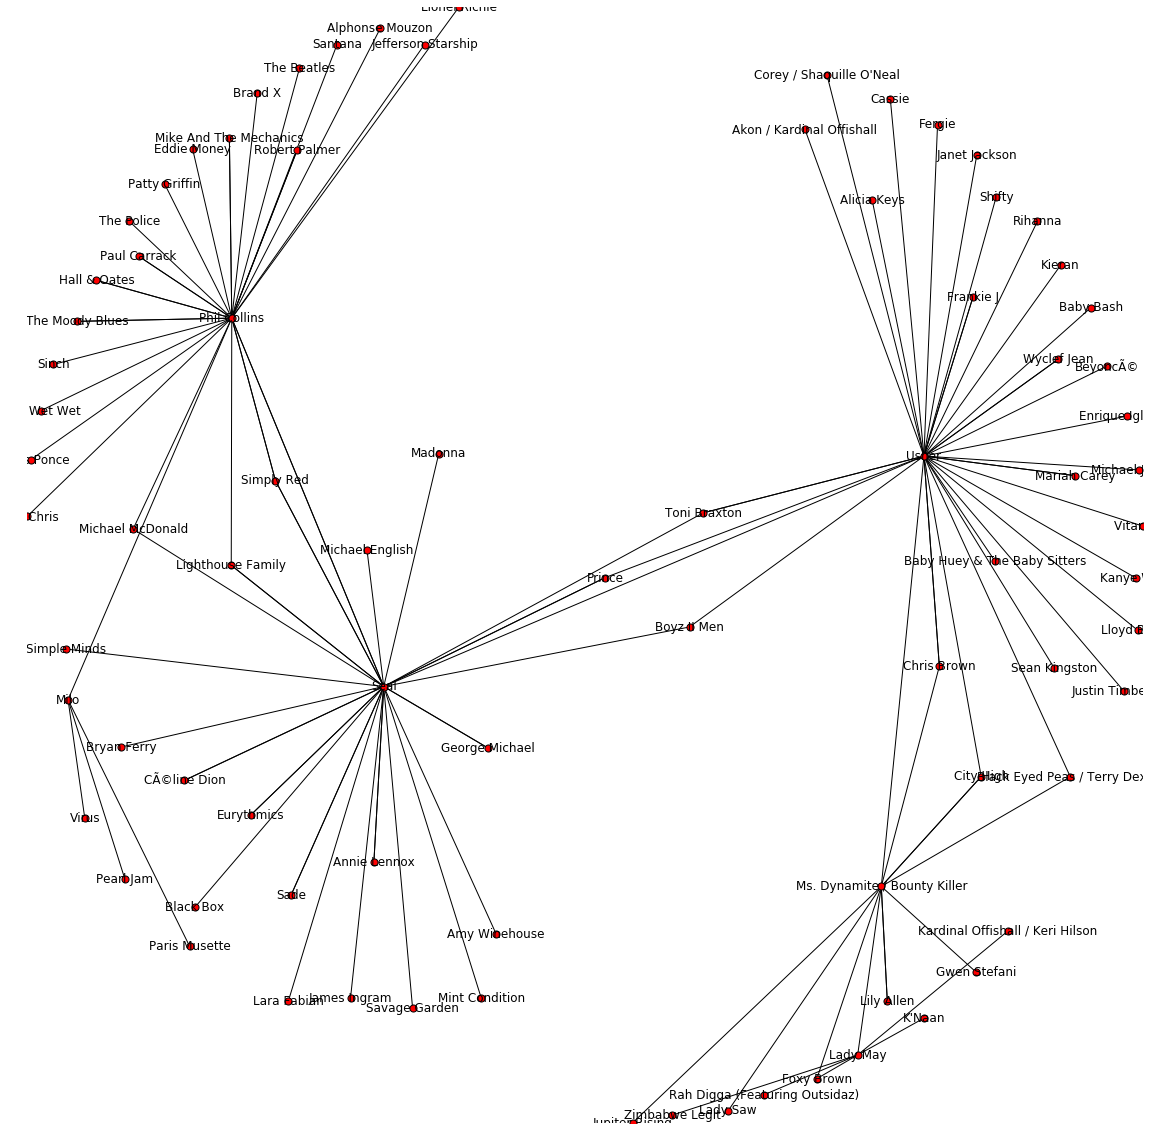

In [27]:
#  Copied this code from stackoverflow 

def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos,edge_cmap=plt.cm.Blues,with_labels=True, node_size=50)
    nx.draw_networkx_edges(graph,pos,edge_cmap=plt.cm.Blues)
    nx.draw_networkx_labels(graph,pos)
    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    plt.savefig(file_name,bbox_inches="tight")
    #pylab.close()
    #del fig

#Assuming that the graph g has nodes and edges entered
save_graph(H,"my_graph.pdf")

 
